## The goal of this notebook is to serve as an example of usage for the regression package

In [1]:
# Imports Go Here
# Public Libraries
import numpy as np
import matplotlib.pyplot as plt
# Custom Libraries
import regression as reg

### Before we start working with a regression package we first need to generate some data. So let's generate some fake data.

In [2]:
def generate_fake_data(predictors:np.ndarray,noise:bool = False,noise_size:float = 0.05) -> tuple[np.ndarray,np.ndarray]:
    '''
        This generates a fake time series based on the inputs. It will randomly determine the
        weights applied to the inputs and reports those weights as well for verifiction of any
        fit applied to this time series.

        Inputs:
        predictors (np.ndarray): An N x M numpy array where there are N inputs of length M. If
        all of the inputs are not of the same length an error will be raised.
        noise (bool): A boolean variable that determines whether or not to add noise to the
        resultant time series. Default (False).
        noise_size (float): The size of the noise (in percent) to the size of the time series
        generated. E.g. if noise_size = 0.1 the noise will be ~10% the size of the measurements.

        Outputs:
        Weights (np.ndarray): A 1-D numpy array of length N+1 reporting the weights applied to
        the inputs as well as the bias term applied to the data for regression verification.
        Fake_Data_Time_Series (np.ndarray): A 1-D numpy array of length M which is the time
        series of fake data generated by this function.
    '''

    #generate the random weights on the predictors
    weights = (np.random.random(size = predictors.shape[0]+1) - 0.5)*2

    #generate the time series
    Fake_Data_Time_Series = np.dot(np.swapaxes(predictors,0,1),weights[:-1])+weights[-1]

    #add noise if applicable
    if noise:
        Fake_Data_Time_Series += np.random.normal(0,np.abs(noise_size*np.mean(Fake_Data_Time_Series)),size = len(Fake_Data_Time_Series))

    return weights,Fake_Data_Time_Series

def report_weights(weights:np.ndarray):
    '''
        Reports the weights from generate_fake_data as they are reported from the regression
        model for ease of comparison.

        Inputs:
        weights(np.ndarray): The weights generated by generate_fake_data.

        Outputs: None
    '''

    weight_names = ['Variable ' + str(int(w+1)) for w in range(len(weights)-1)]
    sorted_inds = np.flip(np.argsort(weights[:-1]))

    print('True Weights:')
    print('----------------------')
    for i in range(len(weight_names)):
        print(weight_names[sorted_inds[i]] + ': ' + f'{weights[sorted_inds[i]]:0.3f}')
    print(f'Bias Term: {weights[-1]:0.3f}')
    print('----------------------')

    return None


In [3]:
#Make inputs to our fake data function
N = 50
Input_1 = np.random.random(N)*10
Input_2 = np.random.random(N)*10
Input_Array = np.array([Input_1,Input_2])

no_noise_weights,no_noise_time_series = generate_fake_data(Input_Array)


In [4]:
# now let's make a regression model and look at its results
# first we can define a model by calling the package 'reg' and creating a regression object
no_noise_model = reg.regression(Y = no_noise_time_series,X = Input_Array)

In [5]:
#We can then fit the model by calling the .fit() method on it
no_noise_model.fit()
# This gives a summary report below

Fit Complete, Elapsed Time (Seconds): 4.02
Epochs Needed: 10000, 100.0% of Max
Model R^2: 1.000, Model MSE: 0.000


In [6]:
# Now let's compare the model's results against those of the true weights
no_noise_model.summary_report()
report_weights(no_noise_weights)

Model Weight Summary Statistics:
--------------------------------
Variable 2: -0.916
Variable 1: -0.973
Bias Term: 0.613
--------------------------------
True Weights:
----------------------
Variable 2: -0.916
Variable 1: -0.973
Bias Term: 0.613
----------------------


#### This seems good in terms of raw numbers but let's look at a plot to verify

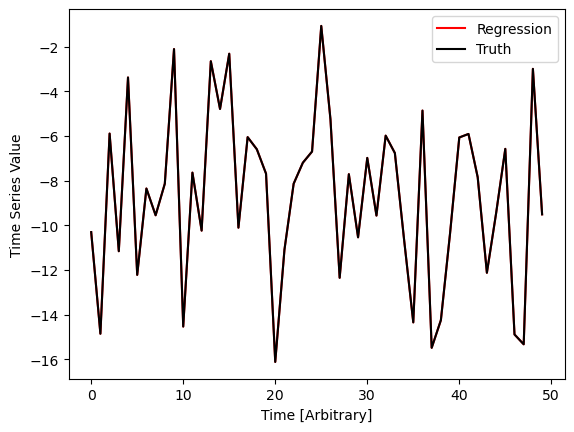

In [7]:
plt.plot(no_noise_model.make_prediction(Input_Array),color = 'r',label = 'Regression')
plt.plot(no_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### This seems good, let's next look at what happens if noise is added

In [8]:
#Make inputs to our fake data function
N = 50
Input_1_noise = np.random.random(N)
Input_2_noise = np.random.random(N)
Input_Array_noise = np.array([Input_1_noise,Input_2_noise])

noise_weights,noise_time_series = generate_fake_data(Input_Array_noise,noise = True)

In [9]:

# now let's make a regression model and look at its results
noise_model = reg.regression(Y = noise_time_series,X = Input_Array_noise)
noise_model.fit()
print('--------------------------')
noise_model.summary_report()
report_weights(noise_weights)

Fit Complete, Elapsed Time (Seconds): 0.16
Epochs Needed: 1341, 13.4% of Max
Model R^2: 0.799, Model MSE: 0.003
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 1: 0.166
Variable 2: -0.046
Bias Term: 0.814
--------------------------------
True Weights:
----------------------
Variable 1: 0.244
Variable 2: -0.163
Bias Term: 0.817
----------------------


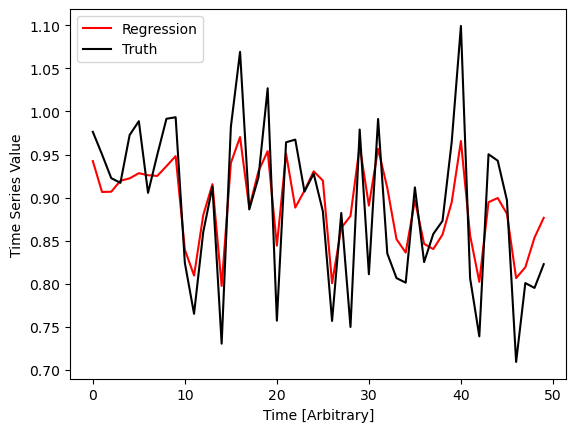

In [10]:
plt.plot(noise_model.make_prediction(Input_Array_noise),color = 'r',label = 'Regression')
plt.plot(noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### The fit is worse. Let's see if we can improve it by changing the settings of the model

In [11]:
# now let's make a regression model and look at its results
# The Learning rate controls how fine a change the model can make between iterations
# The patience pct controls how long the model should wait before stopping the fit early
# Max iterations changes how many epochs the model can try to find a got fit with. The larger
# this number the longer the regression will run
noise_model = reg.regression(Y = noise_time_series,X = Input_Array_noise,
                             learning_rate=1e-3,patience_pct=1e-5, max_iterations=25000)
noise_model.fit()
print('--------------------------')
noise_model.summary_report()
report_weights(noise_weights)

Fit Complete, Elapsed Time (Seconds): 22.42
Epochs Needed: 25000, 100.0% of Max
Model R^2: 0.852, Model MSE: 0.001
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 1: 0.243
Variable 2: -0.139
Bias Term: 0.814
--------------------------------
True Weights:
----------------------
Variable 1: 0.244
Variable 2: -0.163
Bias Term: 0.817
----------------------


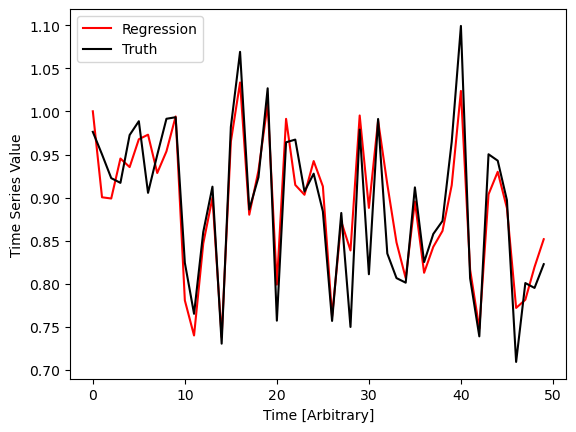

In [12]:
plt.plot(noise_model.make_prediction(Input_Array_noise),color = 'r',label = 'Regression')
plt.plot(noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

### Now let's see what happens if we drastically increase the noise

In [13]:
#Make inputs to our fake data function
N = 50
Input_1_heavy_noise = np.random.random(N)*10
Input_2_heavy_noise = np.random.random(N)*10
Input_3_heavy_noise = np.random.random(N)*10
Input_Array_heavy_noise = np.array([Input_1_heavy_noise,Input_2_heavy_noise,Input_3_heavy_noise])

heavy_noise_weights,heavy_noise_time_series = generate_fake_data(Input_Array_heavy_noise,noise = True,noise_size=0.25)

In [14]:

# now let's make a regression model and look at its results
heavy_noise_model = reg.regression(heavy_noise_time_series,Input_Array_heavy_noise,
                                   learning_rate=1e-3,patience_pct=1e-4)
heavy_noise_model.fit()
print('--------------------------')
heavy_noise_model.summary_report()
report_weights(heavy_noise_weights)

Fit Complete, Elapsed Time (Seconds): 0.04
Epochs Needed: 301, 3.0% of Max
Model R^2: 0.983, Model MSE: 0.244
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: 0.966
Variable 3: -0.001
Variable 1: -0.689
Bias Term: 0.057
--------------------------------
True Weights:
----------------------
Variable 2: 0.969
Variable 3: 0.007
Variable 1: -0.679
Bias Term: -0.061
----------------------


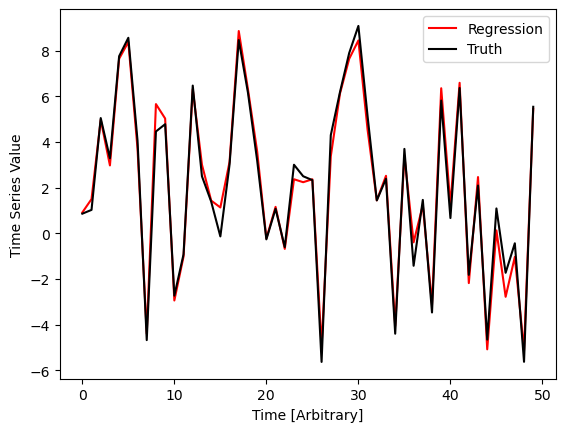

In [15]:
plt.plot(heavy_noise_model.make_prediction(Input_Array_heavy_noise),color = 'r',label = 'Regression')
plt.plot(heavy_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### Performance is worse but still isn't bad.

#### Now let's try with a lot of inputs and a reasonable amount of noise

In [16]:
#Need to increase N based on the number of inputs, more inputs more data needed to try and get at them
num_inputs = 8
N = num_inputs*50
Input_list = [np.random.random(N)*2 for i in range(num_inputs)]
Input_Array = np.array(Input_list)

many_input_weights,many_input_time_series = generate_fake_data(Input_Array,noise = True,noise_size=0.05)

In [17]:
# now let's make a regression model and look at its results
many_input_model = reg.regression(many_input_time_series,Input_Array,learning_rate=1e-2,patience_pct=1e-4,
                                  max_iterations=30000)
many_input_model.fit()
print('--------------------------')
many_input_model.summary_report()
report_weights(many_input_weights)

Fit Complete, Elapsed Time (Seconds): 1.23
Epochs Needed: 2751, 9.2% of Max
Model R^2: 0.994, Model MSE: 0.002
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 7: 0.248
Variable 4: 0.133
Variable 6: 0.024
Variable 5: 0.016
Variable 1: -0.088
Variable 3: -0.262
Variable 8: -0.426
Variable 2: -0.816
Bias Term: 0.270
--------------------------------
True Weights:
----------------------
Variable 7: 0.239
Variable 4: 0.137
Variable 6: 0.019
Variable 5: 0.014
Variable 1: -0.097
Variable 3: -0.269
Variable 8: -0.432
Variable 2: -0.816
Bias Term: 0.308
----------------------


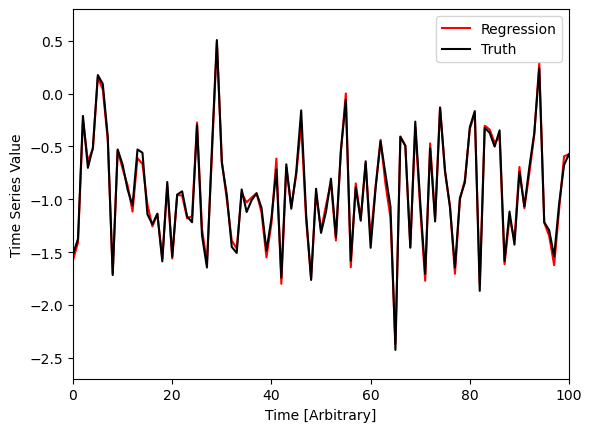

In [18]:
plt.plot(many_input_model.make_prediction(Input_Array),color = 'r',label = 'Regression')
plt.plot(many_input_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,100)
plt.show()

#### Now let's look at what happens with a linear interaction model

In [19]:
#Make inputs to our fake data function
N = 150
Input_1_interaction = np.random.random(N)*2
Input_2_interaction = np.random.random(N)*2
Input_3_interaction = (Input_1_interaction*Input_2_interaction)
Input_Array_interaction = np.array([Input_1_interaction,Input_2_interaction,Input_3_interaction])

interaction_no_noise_weights,interaction_no_noise_time_series = generate_fake_data(Input_Array_interaction,noise = False)

In [20]:

# take away the interaction input so the model can't see it and change the model type to linear_with_interaction
interaction_model = reg.regression(interaction_no_noise_time_series,Input_Array_interaction[:-1],learning_rate=1e-3,patience_pct=1e-4,
                                   model_type='linear_with_interaction',max_iterations=50000)
interaction_model.fit()
print('--------------------------')
interaction_model.summary_report()
report_weights(interaction_no_noise_weights)

Fit Complete, Elapsed Time (Seconds): 86.09
Epochs Needed: 50000, 100.0% of Max
Model R^2: 1.000, Model MSE: 1.257
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 1-Variable 2 Interaction: 0.855
Variable 2: 0.407
Variable 1: -0.022
Bias Term: 0.685
--------------------------------
True Weights:
----------------------
Variable 3: 0.856
Variable 2: 0.406
Variable 1: -0.024
Bias Term: 0.687
----------------------


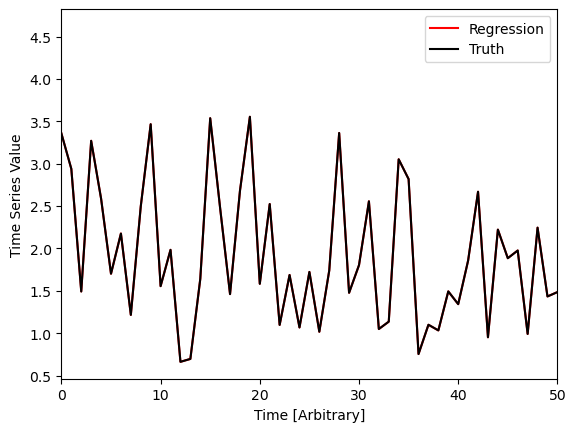

In [21]:
plt.plot(interaction_model.make_prediction(Input_Array_interaction[:-1]),color = 'r',label = 'Regression')
plt.plot(interaction_no_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,50)
plt.show()

#### Now let's add noise to the interaction model

In [22]:
#Make inputs to our fake data function
N = 150
Input_1_interaction = (np.random.random(N)+ 0.5)*6
Input_2_interaction = (np.random.random(N)- 0.5)*5
Input_3_interaction = (np.random.random(N) + 1) * 4
Input_4_interaction = (Input_1_interaction*Input_2_interaction)
Input_5_interaction = (Input_1_interaction*Input_3_interaction)
Input_6_interaction = (Input_2_interaction*Input_3_interaction)

Input_Array_interaction = np.array([Input_1_interaction,Input_2_interaction,Input_3_interaction,
                                    Input_4_interaction,Input_5_interaction,Input_6_interaction])

interaction_noise_weights,interaction_noise_time_series = generate_fake_data(Input_Array_interaction,noise = True)

In [23]:

# take away the interaction input so the model can't see it and change the model type to linear_with_interaction
interaction_model = reg.regression(interaction_noise_time_series,Input_Array_interaction[:-3],learning_rate=1e-4,patience_pct=1e-4,
                                   model_type='linear_with_interaction',max_iterations=50000)
interaction_model.fit()
print('--------------------------')
interaction_model.summary_report()
report_weights(interaction_noise_weights)

Fit Complete, Elapsed Time (Seconds): 4.02
Epochs Needed: 9411, 18.8% of Max
Model R^2: 0.998, Model MSE: 435.701
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: 1.262
Variable 3: 0.587
Variable 1: 0.403
Variable 1-Variable 3 Interaction: -0.492
Variable 2-Variable 3 Interaction: -0.618
Variable 1-Variable 2 Interaction: -0.710
Bias Term: 1.879
--------------------------------
True Weights:
----------------------
Variable 3: 0.819
Variable 1: 0.565
Variable 2: 0.469
Variable 5: -0.510
Variable 6: -0.514
Variable 4: -0.682
Bias Term: 0.190
----------------------


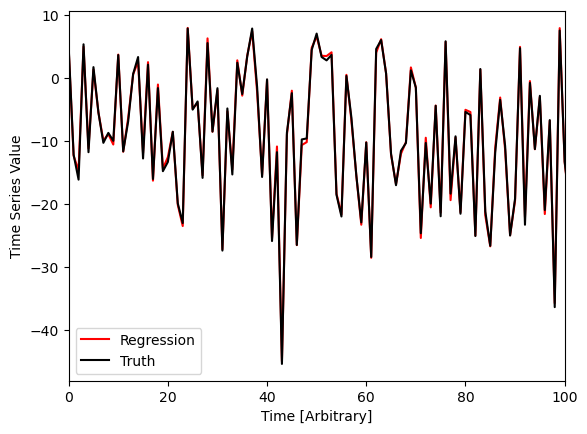

In [24]:
plt.plot(interaction_model.make_prediction(Input_Array_interaction[:-3]),color = 'r',label = 'Regression')
plt.plot(interaction_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,100)
plt.show()

#### You can also give the model the names of variables and it will use them in the summary it provides

In [25]:
N = 50
Input_1_name = np.random.random(N)*10
Input_2_name = np.random.random(N)*10
Input_3_name = np.random.random(N)*10
Input_name_list = ['Pepperoni','Cheese','Veggie']

Input_Array_name = np.array([Input_1_name,Input_2_name,Input_3_name])

name_weights,name_time_series = generate_fake_data(Input_Array_name)

In [26]:
name_model = reg.regression(name_time_series,Input_Array_name,predictor_names=Input_name_list,
                            learning_rate=1e-2,patience_pct=1e-5)
name_model.fit()
name_model.summary_report()
report_weights(name_weights)

Fit Complete, Elapsed Time (Seconds): 4.34
Epochs Needed: 10000, 100.0% of Max
Model R^2: 1.000, Model MSE: 0.000
Model Weight Summary Statistics:
--------------------------------
Cheese: 0.921
Pepperoni: 0.255
Veggie: -0.050
Bias Term: 0.659
--------------------------------
True Weights:
----------------------
Variable 2: 0.921
Variable 1: 0.255
Variable 3: -0.050
Bias Term: 0.659
----------------------


#### If you make it an interaction model the variables will be given interaction names automatically as well

In [27]:
name_model = reg.regression(name_time_series,Input_Array_name,predictor_names=Input_name_list,
                            learning_rate=1e-4,patience_pct=1e-5,model_type='linear_with_interaction',
                            max_iterations=20000)
name_model.fit()
name_model.summary_report()
report_weights(name_weights)

Fit Complete, Elapsed Time (Seconds): 15.40
Epochs Needed: 20000, 100.0% of Max
Model R^2: 0.999, Model MSE: 0.496
Model Weight Summary Statistics:
--------------------------------
Cheese: 0.839
Pepperoni: 0.142
Pepperoni-Cheese Interaction: 0.012
Pepperoni-Veggie Interaction: 0.009
Cheese-Veggie Interaction: 0.003
Veggie: -0.119
Bias Term: 1.408
--------------------------------
True Weights:
----------------------
Variable 2: 0.921
Variable 1: 0.255
Variable 3: -0.050
Bias Term: 0.659
----------------------


#### Now let's explore the Logistic Regression Model

In [28]:
# Logistic Regression estimates the probability of something based on the predictors
# Let's load in the Iris dataset
iris_ds = np.genfromtxt('iris.csv',delimiter=',')
sepal_length = iris_ds[:,0]
sepal_width = iris_ds[:,1]
petal_length = iris_ds[:,2]
petal_width = iris_ds[:,3]
species_type = iris_ds[:,4]

#we're going to use the two of the species Setosa and Virginica
#Because they are more easily separable and this is an example
sepal_length = sepal_length[np.where(species_type %2 == 0)]
sepal_width = sepal_width[np.where(species_type %2 == 0)]
petal_length = petal_length[np.where(species_type %2 == 0)]
petal_width = petal_width[np.where(species_type %2 == 0)]
species_type = species_type[np.where(species_type %2 == 0)]

#replace the 2 for Virginica with 1 so they're coded binarily
species_type[np.where(species_type == 2)] = 1
species_type[np.where(species_type == 0)] = 0

#randomize the order of these
def random_order(array):
    rng = np.random.default_rng(np.random.randint(144))#i chose seed 144 becuase its my favorite number
    #make the inds
    inds = np.arange(0,len(array),1)
    #shuffle them using the Fisher-Yates Shuffle (Uniform)
    rng.shuffle(inds)

    return inds

random_inds = random_order(species_type)

sepal_length = sepal_length[random_inds]
sepal_width = sepal_width[random_inds]
petal_length = petal_length[random_inds]
petal_width = petal_width[random_inds]
species_type = species_type[random_inds]

#now reserve the last 5 of each for testing
cutoff = 5
sepal_length_test = sepal_length[-cutoff:]
sepal_length_train = sepal_length[:-cutoff]
sepal_width_test = sepal_width[-cutoff:]
sepal_width_train = sepal_width[:-cutoff]
petal_length_test = petal_length[-cutoff:]
petal_length_train = petal_length[:-cutoff]
petal_width_test = petal_width[-cutoff:]
petal_width_train = petal_width[:-cutoff]
species_type_test = species_type[-cutoff:]
species_type_train = species_type[:-cutoff]


In [29]:
train_Y = species_type_train[:]
train_X = np.array([sepal_length_train,sepal_width_train,petal_length_train,petal_width_train])

test_Y = species_type_test[:]
test_X = np.array([sepal_length_test,sepal_width_test,petal_length_test,petal_width_test])

In [32]:
#now make the model and train it
logistic_model = reg.regression(train_Y,train_X,
                                model_type='logistic',
                                predictor_names=['sepal_length','sepal_width','petal_length','petal_width'])
logistic_model.fit()

Fit Complete, Elapsed Time (Seconds): 0.01
Epochs Needed: 11, 0.1% of Max
Model Accuracy: 1.000, Model Precision: 1.000


In [33]:
logistic_model.summary_report()

Model Weight Summary Statistics:
--------------------------------
petal_length: 8.038
petal_width: 5.057
sepal_length: -2.663
sepal_width: -3.540
Bias Term: -1.023
--------------------------------
